# Project 3: Collaboration and Competition

## Introduction

The target of this project is to design, train and evaluate a deep reinforcement learning algorithm that enables an agent to control rackets to bounce a ball over a net in a self-play mode. The goal for the self-play agent is to hit the ball over the net as many times as possible. This environment is provided by Unity Machine Learning Agents (ML-Agents) which is an open-source Unity plugin that enables games and simulations to serve as environments for training intelligent agents.

The task of hitting the ball over the net is episodic. Once an agent is able to score an average of +0.5 points over 100 consecutive episodes the environment is solved.

## Implementation#

The observation space consists of 8 distinct variables corresponding to the 2-dimensional position and velocity of the ball and the agent's own racket. As 3 subsequent frames are stacked to one observation this amounts to a total of 24 state dimensions. Each agent receives its own, local observation. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. Every entry in the action vector should be a number between -1 and 1.

For any observed 24-dimensional state a suitable implementation of an agent needs to map this state to a 2-dimensional action vector. Through learning over time the agent is expected to act in a way that maximizes the achieved score (sum of discounted rewards) per episode.

In this multi-agent tennis environment 2 players are playing in parallel. The experience collected by both of them is used for the training of a single agent. As self-play is used this single agent controls both rackets.

### Learning Algorithm

The solution described here is based on the deep deterministic policy gradients (DDPG) algorithm. It utilizes an actor critic architecture with experience replay, soft target network updates, gradient clipping and noise decay. For both, the actor and the critic, a fully connected neural network architecture is chosen here with two hidden layers of 256 and 196 neurons respectively, relu activations, and batch normalization before the activations of the first hidden layer. The 2-node output layer (action space) of the actor network makes use of tanh activations to satisfy the action value range of -1 to 1.

For implementing experience replay, a buffer capable of storing up to 100,000 experience tuples is utilized. Every 10th time step 10 learning cycles are initiated. During each cycle 1024 experience tuples are randomly sampled from the buffer (given there are already at least 1024 tuples in the buffer) and used to train the networks. The training itself uses the sampled experience tuples to train the actor and the critic network with a learning rate of 0.001 and without weight decay. The target actor and critic networks are updated at the end of every learning cycle with an interpolation tau of 0.001 from the respective local networks. Exploration is enforced through an OU process that adds noise to the actor outputs with a theta of 0.15 and a sigma of 0.2. This added noise decays with a decay factor of 0.9999.

Future rewards are discounted by a gamma of 0.99.

### Training Results

The training is scheduled to run for up to 10,000 episodes and with up to 1,000 time steps per episode. However, as soon as an average score of the self-play agent of +0.5 is achieved over the last 100 consecutive episodes the environment is solved and the training stops. With the above described learning algorithm scores as plotted in the following graph have been achieved per episode during training.

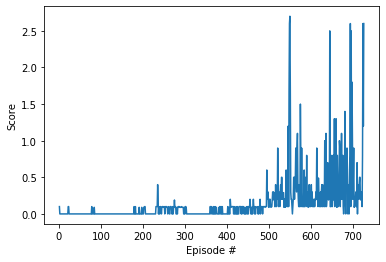

After a training of 726 episodes an average score of 0.52 was achieved by the agent. Hence, it took the agent 726 episodes to solve this environment.

## Future Work

There are apparently many ways to further improve the agent's performance. For example, due to long training times, so far only a relatively small set of possible hyperparameter settings have been evaluated manually. This hyperparameter optimization process could be automated using techniques such as grid search. As part of this optimization process the architecture of both networks (number of layers, layer type, neurons per hidden layer, batch normalization) and hyperparameters of the employed neural networks shall be included as well.

Considering the multiagent nature of the tennis environment it will also be beneficial to include the other agent's actions in the evaluation done by the own critic.

Further improvements are expected to be achieved by implementing prioritized experience replay.

The performance of alternative algorithms as compared in "Benchmarking Deep Reinforcement Learning for Continuous Control" (Duan et al., 2016) may also be investigated.